In [ ]:
import torch
from matplotlib import pyplot as plt
from torchvision import transforms, datasets

In [ ]:
dataset = datasets.FashionMNIST(root='~/studies/data',train=True,transform=transforms.ToTensor(), download=True)
data, label = next(iter(torch.utils.data.DataLoader(dataset,len(dataset),shuffle=False)))

In [ ]:
data_flat = data.view(len(dataset), -1)
data_mean = data_flat.mean(0)
data_centered = data_flat - data_mean

In [ ]:
from sklearn.decomposition import FastICA

X = data_centered.numpy()          # (N, 784)

ica = FastICA(
    n_components=25,
    whiten='unit-variance',
    random_state=0,
    max_iter=1000
)

S = ica.fit_transform(X)           # (N, 25)  independent components (sources)
A = ica.mixing_                    # (784, 25) mixing matrix

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(A[:, i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    S[:, 0], S[:, 1],
    c=label.numpy(),
    s=3,
    cmap='tab10',
    alpha=0.6
)
plt.colorbar(scatter)
plt.xlabel("IC 1")
plt.ylabel("IC 2")
plt.title("ICA projection (first two components)")
plt.show()

In [ ]:
U, S, Vt = torch.linalg.svd(data_centered, full_matrices=False)

In [61]:
import numpy as np
np.random.seed(0)

N = 12
n = 2

data_flat = np.random.randn(N, n)
data_mean = data_flat.mean(0)
data_centered = data_flat - data_mean

U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)

k = 1
data_proj_k = data_centered @ Vt[:k, :].T # (N,n) @ (k, n).T = (N, k)
data_recon_k = data_proj_k @ Vt[:k, :] # (N, k) @ (k, n) = (N, n)
print(data_proj_k.shape)
print(data_recon_k.shape)

pc1 = Vt[0]
pc2 = Vt[1]
origin = data_mean

(12, 1)
(12, 2)


In [107]:
import numpy as np
np.random.seed(0)

N1 = 1000
N2 = 1000
n = 2

# shared ellipse parameters
a, b = 3.0, 0.5
noise = 0.02

def filled_ellipse(N, theta, shift=(0.0, 0.0)):
    t = 2 * np.pi * np.random.rand(N)
    r = np.sqrt(np.random.rand(N))

    x = a * r * np.cos(t)
    y = b * r * np.sin(t)

    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])

    pts = np.stack([x, y], axis=1) @ R.T
    pts += np.array(shift)
    pts += noise * np.random.randn(N, 2)
    return pts

# two same-size ellipses, different rotations
ellipse1 = filled_ellipse(N1, theta=np.deg2rad(25))
ellipse2 = filled_ellipse(N2, theta=np.deg2rad(-40))

data_flat = np.vstack([ellipse1, ellipse2])

# PCA
data_mean = data_flat.mean(0)
data_centered = data_flat - data_mean


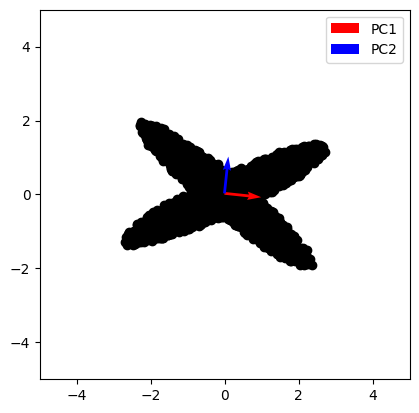

In [108]:
U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)

pc1 = Vt[0]
pc2 = Vt[1]
origin = data_mean

# PLOT DATA
plt.scatter(
    data_flat[:, 0],
    data_flat[:, 1],
    c='k'
)

# PLOT PCs
plt.quiver(
    origin[0], origin[1],      # start
    pc1[0], pc1[1],            # direction of PC1
    angles='xy', scale_units='xy', scale=1,
    color='r', label='PC1'
)

plt.quiver(
    origin[0], origin[1],
    pc2[0], pc2[1],
    angles='xy', scale_units='xy', scale=1,
    color='b', label='PC2'
)


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()


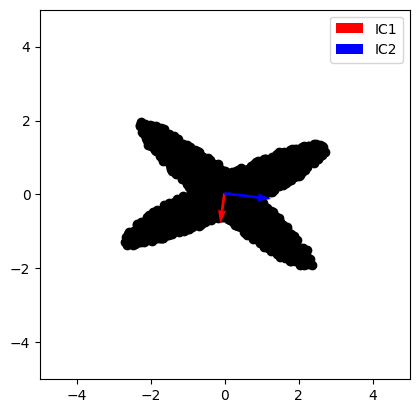

In [109]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2, whiten='unit-variance', random_state=0)
S = ica.fit_transform(data_centered)   # sources (N, 2)
A = ica.mixing_                        # mixing matrix (2, 2)

# ICA directions in data space
ic1 = A[:, 0]
ic2 = A[:, 1]


# ----- PLOT -----
plt.scatter(data_flat[:, 0], data_flat[:, 1], c='k')

# independent components
plt.quiver(
    data_mean[0], data_mean[1],
    ic1[0], ic1[1],
    angles='xy', scale_units='xy', scale=1,
    color='r', label='IC1'
)

plt.quiver(
    data_mean[0], data_mean[1],
    ic2[0], ic2[1],
    angles='xy', scale_units='xy', scale=1,
    color='b', label='IC2'
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()
